A perceptron is the simplest type of artificial neural network, consisting of a single layer of neurons that use weighted inputs, a bias, and an activation function (usually a step function) to make binary classifications.

In [ ]:
 !pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
npts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
#Chooses random 100 points around the centers
X, y = datasets.make_blobs(n_samples=npts, centers=centers, random_state=123, cluster_std=0.4) ## if cluster_std == 0 then exactly around the center is chosen

In [ ]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y).reshape(100,1)

In [ ]:
print(x_data.shape)
print(y_data.shape)

torch.Size([100, 2])
torch.Size([100, 1])


In [ ]:
def scatterplot():
  plt.scatter(X[y==0, 0], X[y==0,1])
  plt.scatter(X[y==1, 0], X[y==1,1])

WHat is CROSS ENTROPY

Cross-entropy is a loss function used in classification problems to measure the difference between two probability distributions: the true labels and the predicted probabilities. It quantifies how well the predicted probability distribution matches the actual distribution.


negative Summation(ln of all probabilities)

GD tries to reduce this cross entropy and updates the weights of line equation (mx + c)

FOR PREDICTION - Since this is a classifier, activation function is applied on top of the (mx+c value). Here, we apply sigmoid function -> 1/(1+e^-x)

PERCEPTRON CONTAINS ONLY 1 INPUT LAYER, 1 OUTPUT LAYER
NO HIDDEN LAYERS IN BETWEEN

In [ ]:
import torch.nn as nn

In [ ]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(input_size,output_size) # Initialize the linear regression function
    #self.sigmoid = nn.Sigmoid() # Initialize the sigmoid function

  def forward(self, x):
    x = self.fc1(x) #Apply the linear function to x
    pred = torch.sigmoid(x) #Appy sigmoid funct
    return pred
  def predict (self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0


In [ ]:
##Creating a model with two inputs and single output
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [ ]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(), b[0].item())


In [ ]:
## WE Plot the line using the initial weights and biases. line equation -- w1*x + w2*x + b = 0
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-3, 3])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1, x2, 'r')
  scatterplot()

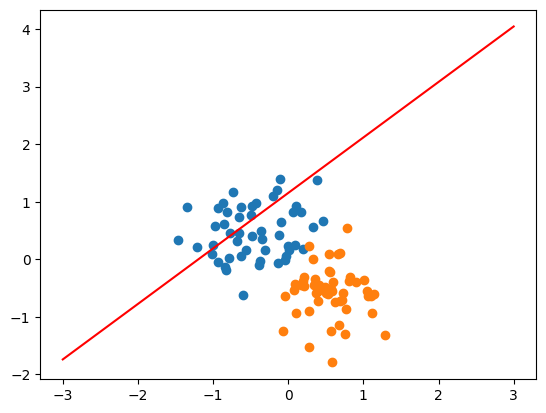

In [ ]:
plot_fit('Initial Model')

Initial model is not good

In [ ]:
criterion = nn.BCELoss() ##LOSS FUNCTION
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) ##OPTIMIZATION FUNCTION

In [ ]:
epochs =1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print('epoch: ', i, 'loss: ', loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:  0 loss:  0.6185115575790405
epoch:  1 loss:  0.617464005947113
epoch:  2 loss:  0.6164200305938721
epoch:  3 loss:  0.6153795123100281
epoch:  4 loss:  0.6143423318862915
epoch:  5 loss:  0.6133086681365967
epoch:  6 loss:  0.612278401851654
epoch:  7 loss:  0.6112515330314636
epoch:  8 loss:  0.6102280020713806
epoch:  9 loss:  0.6092078685760498
epoch:  10 loss:  0.6081911325454712
epoch:  11 loss:  0.607177734375
epoch:  12 loss:  0.6061676740646362
epoch:  13 loss:  0.6051609516143799
epoch:  14 loss:  0.6041575074195862
epoch:  15 loss:  0.6031573414802551
epoch:  16 loss:  0.6021605730056763
epoch:  17 loss:  0.6011670231819153
epoch:  18 loss:  0.6001767516136169
epoch:  19 loss:  0.5991896986961365
epoch:  20 loss:  0.5982059240341187
epoch:  21 loss:  0.5972253680229187
epoch:  22 loss:  0.5962480306625366
epoch:  23 loss:  0.5952739119529724
epoch:  24 loss:  0.5943029522895813
epoch:  25 loss:  0.5933352112770081
epoch:  26 loss:  0.5923705697059631
epoch:  27 loss: 

Text(0.5, 0, 'epoch')

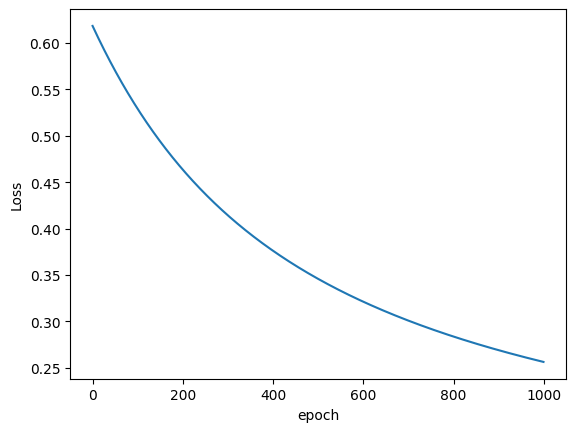

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

Since there is no sharp elbow here, the loss is not converged. We can run for more epochs for convergence

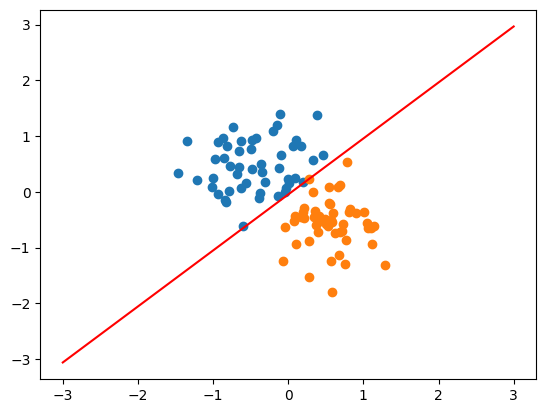

In [ ]:
plot_fit('Trained Model')

## NEW PREDICTION

Red point positive probability = 0.6281726956367493
Black point positive probability = 0.4659110903739929
Red point prediction = 1
Black point prediction = 0


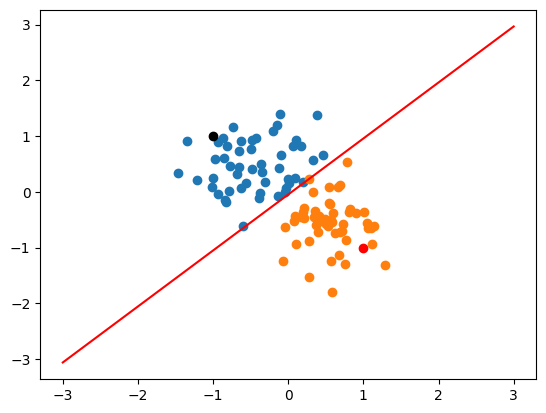

In [ ]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print("Red point positive probability = {}".format(model.forward(point1).item()))#Probability for Class 1
print("Black point positive probability = {}".format(model.forward(point2).item())) #Probability for Class 1
print("Red point prediction = {}".format(model.predict(point1)))#Probability for Class 0
print("Black point prediction = {}".format(model.predict(point2))) #Probability for Class 1
plot_fit('Trained Model')